# Import Libraries and Clone Github

In [1]:
# Import Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import userdata
from IPython.display import display, HTML

In [2]:
# Global Variables
SENTIMENT_COLUMNS = [
    'Finance',
    'Production',
    'Reserves / Exploration / Acquisitions / Mergers / Divestments',
    'Environment / Regulatory / Geopolitics',
    'Alternative Energy / Lower Carbon',
    'Oil Price / Natural Gas Price / Gasoline Price']

PALETTE_1 = {'Positive': '#005a32', 'Neutral': '#2c3e50', 'Negative': '#99000d'}
PALETTE_2 = {'Positive': '#238b45', 'Neutral': '#4d4d8d', 'Negative': '#d73027'}
HUE_ORDER = ['Positive', 'Neutral', 'Negative']

In [3]:
# Import github token with google secrets thingy and clone git repository
GITHUB_TOKEN = userdata.get('github')
os.environ['GITHUB_TOKEN'] = GITHUB_TOKEN
!git clone https://{GITHUB_TOKEN}@github.com/Kussil/Financial_Sentiment_LLM.git

fatal: destination path 'Financial_Sentiment_LLM' already exists and is not an empty directory.


In [4]:
# Import Sentiment Data
prompt1_df = pd.read_csv('/content/Financial_Sentiment_LLM/03_Sentiment_Analysis/Gemini/Prompt1/Prompt1_Sentiment_Analysis_Results.csv')
prompt1_check_df = pd.read_csv('/content/Financial_Sentiment_LLM/03_Sentiment_Analysis/Gemini/Prompt1/Prompt1_Bias_Check_Sentiment_Analysis_Results.csv')

# Define custom date parsing function as dates are in different formats sometimes
def parse_dates(date):
    """
    Parse dates from multiple formats into datetime objects.

    This function attempts to parse a date string into a pandas datetime object
    using a list of predefined formats. If the date string does not match any
    of the specified formats, it returns `pd.NaT`.

    Supported formats:
    - '%d-%b-%y' (e.g., '17-Aug-22')
    - '%m/%d/%Y' (e.g., '5/11/2024')
    - '%b-%d-%Y' (e.g., 'Apr-26-2024')

    Parameters:
    date (str): The date string to be parsed.

    Returns:
    pd.Timestamp or pd.NaT: The parsed datetime object if successful, or `pd.NaT` if parsing fails.
    """
    for fmt in ('%d-%b-%y', '%m/%d/%Y', '%b-%d-%Y'):
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            pass
    return pd.NaT

# Apply custom date parsing function
prompt1_df['Date'] = prompt1_df['Date'].apply(parse_dates)
prompt1_check_df['Date'] = pd.to_datetime(prompt1_check_df['Date'], errors='coerce')
display(prompt1_df.head())
display(prompt1_check_df.head())

,Source,Unique_ID,Ticker,Date,URL,Finance,Production,Reserves / Exploration / Acquisitions / Mergers / Divestments,Environment / Regulatory / Geopolitics,Alternative Energy / Lower Carbon,Oil Price / Natural Gas Price / Gasoline Price
0,Investment Research,IR-1,MRO,2024-05-16,NaN,Positive,Neutral,Positive,Negative,Neutral,Neutral
1,Investment Research,IR-2,EOG,2024-05-14,NaN,Positive,Neutral,Positive,Neutral,Positive,Neutral
2,Investment Research,IR-3,EOG,2024-05-11,NaN,Positive,Positive,Positive,Neutral,Neutral,Neutral
3,Investment Research,IR-4,DVN,2024-05-11,NaN,Positive,Neutral,Positive,Negative,Neutral,Neutral
4,Investment Research,IR-5,COP,2024-05-07,NaN,Positive,Neutral,Neutral,Negative,Neutral,Neutral


,Source,Unique_ID,Ticker,Date,URL,Finance,Production,Reserves / Exploration / Acquisitions / Mergers / Divestments,Environment / Regulatory / Geopolitics,Alternative Energy / Lower Carbon,Oil Price / Natural Gas Price / Gasoline Price
0,Investment Research,IR-1,MRO,2024-05-16,NaN,Neutral,Neutral,Positive,Negative,Neutral,Neutral
1,Investment Research,IR-2,EOG,2024-05-14,NaN,Positive,Neutral,Positive,Neutral,Neutral,Neutral
2,Investment Research,IR-3,EOG,2024-05-11,NaN,Positive,Neutral,Positive,Neutral,Neutral,Neutral
3,Investment Research,IR-4,DVN,2024-05-11,NaN,Positive,Neutral,Neutral,Neutral,Neutral,Negative
4,Investment Research,IR-5,COP,2024-05-07,NaN,Neutral,Neutral,Positive,Negative,Neutral,Neutral


In [5]:
# Find the indexes of rows with blanks in the sentiment columns of the bias df
rows_with_blanks = prompt1_check_df[SENTIMENT_COLUMNS].isnull().any(axis=1)

# Get the indexes of these rows
indexes_with_blanks = prompt1_check_df[rows_with_blanks].index

# Remove these indexes from both dataframes
prompt1_df_cleaned = prompt1_df.drop(indexes_with_blanks)
prompt1_check_df_cleaned = prompt1_check_df.drop(indexes_with_blanks)

# Check the tail of both cleaned dataframes
display(prompt1_df_cleaned.tail())
display(prompt1_check_df_cleaned.tail())

,Source,Unique_ID,Ticker,Date,URL,Finance,Production,Reserves / Exploration / Acquisitions / Mergers / Divestments,Environment / Regulatory / Geopolitics,Alternative Energy / Lower Carbon,Oil Price / Natural Gas Price / Gasoline Price
10120,Earnings Call Q&A,EQ-338,XOM,2021-02-02,NaN,Positive,Neutral,Negative,Positive,Positive,Neutral
10121,Earnings Call Q&A,EQ-339,COP,2021-02-02,NaN,Positive,Positive,Neutral,Positive,Positive,Neutral
10122,Earnings Call Q&A,EQ-340,EOG,2019-05-03,NaN,Positive,Positive,Positive,Neutral,Neutral,Neutral
10123,Earnings Call Q&A,EQ-341,SHEL,2019-05-02,NaN,Positive,Positive,Neutral,Neutral,Positive,Neutral
10124,Earnings Call Q&A,EQ-342,COP,2019-04-30,NaN,Positive,Neutral,Neutral,Neutral,Neutral,Neutral


,Source,Unique_ID,Ticker,Date,URL,Finance,Production,Reserves / Exploration / Acquisitions / Mergers / Divestments,Environment / Regulatory / Geopolitics,Alternative Energy / Lower Carbon,Oil Price / Natural Gas Price / Gasoline Price
1411,Investment Research,IR-1413,DVN,2020-10-17,NaN,Positive,Neutral,Positive,Neutral,Neutral,Neutral
1412,Investment Research,IR-1414,EOG,2020-10-17,NaN,Neutral,Positive,Positive,Neutral,Neutral,Negative
1413,Investment Research,IR-1415,MRO,2020-10-17,NaN,Neutral,Negative,Neutral,Negative,Neutral,Negative
1414,Investment Research,IR-1416,CXO,2020-10-17,NaN,Positive,Positive,Positive,Neutral,Neutral,Positive
1415,Investment Research,IR-1417,PXD,2020-10-17,NaN,Positive,Neutral,Positive,Neutral,Neutral,Negative


In [6]:
# Not sure why the other one did not work so cleaning prompt1_df separately
# Identify the indices greater than 1415
indexes_to_drop = prompt1_df[prompt1_df.index > 1415].index

# Drop these indices from both dataframes
prompt1_df_cleaned = prompt1_df.drop(indexes_to_drop)

# Display the tail of both cleaned dataframes
display(prompt1_df_cleaned.tail())
display(prompt1_check_df_cleaned.tail())

,Source,Unique_ID,Ticker,Date,URL,Finance,Production,Reserves / Exploration / Acquisitions / Mergers / Divestments,Environment / Regulatory / Geopolitics,Alternative Energy / Lower Carbon,Oil Price / Natural Gas Price / Gasoline Price
1411,Investment Research,IR-1413,DVN,2020-10-17,NaN,Positive,Neutral,Positive,Negative,Neutral,Negative
1412,Investment Research,IR-1414,EOG,2020-10-17,NaN,Positive,Neutral,Neutral,Neutral,Neutral,Negative
1413,Investment Research,IR-1415,MRO,2020-10-17,NaN,Negative,Neutral,Negative,Negative,Neutral,Negative
1414,Investment Research,IR-1416,CXO,2020-10-17,NaN,Positive,Neutral,Neutral,Neutral,Neutral,Neutral
1415,Investment Research,IR-1417,PXD,2020-10-17,NaN,Positive,Neutral,Negative,Neutral,Neutral,Negative


,Source,Unique_ID,Ticker,Date,URL,Finance,Production,Reserves / Exploration / Acquisitions / Mergers / Divestments,Environment / Regulatory / Geopolitics,Alternative Energy / Lower Carbon,Oil Price / Natural Gas Price / Gasoline Price
1411,Investment Research,IR-1413,DVN,2020-10-17,NaN,Positive,Neutral,Positive,Neutral,Neutral,Neutral
1412,Investment Research,IR-1414,EOG,2020-10-17,NaN,Neutral,Positive,Positive,Neutral,Neutral,Negative
1413,Investment Research,IR-1415,MRO,2020-10-17,NaN,Neutral,Negative,Neutral,Negative,Neutral,Negative
1414,Investment Research,IR-1416,CXO,2020-10-17,NaN,Positive,Positive,Positive,Neutral,Neutral,Positive
1415,Investment Research,IR-1417,PXD,2020-10-17,NaN,Positive,Neutral,Positive,Neutral,Neutral,Negative


# Visualize Potential Bias

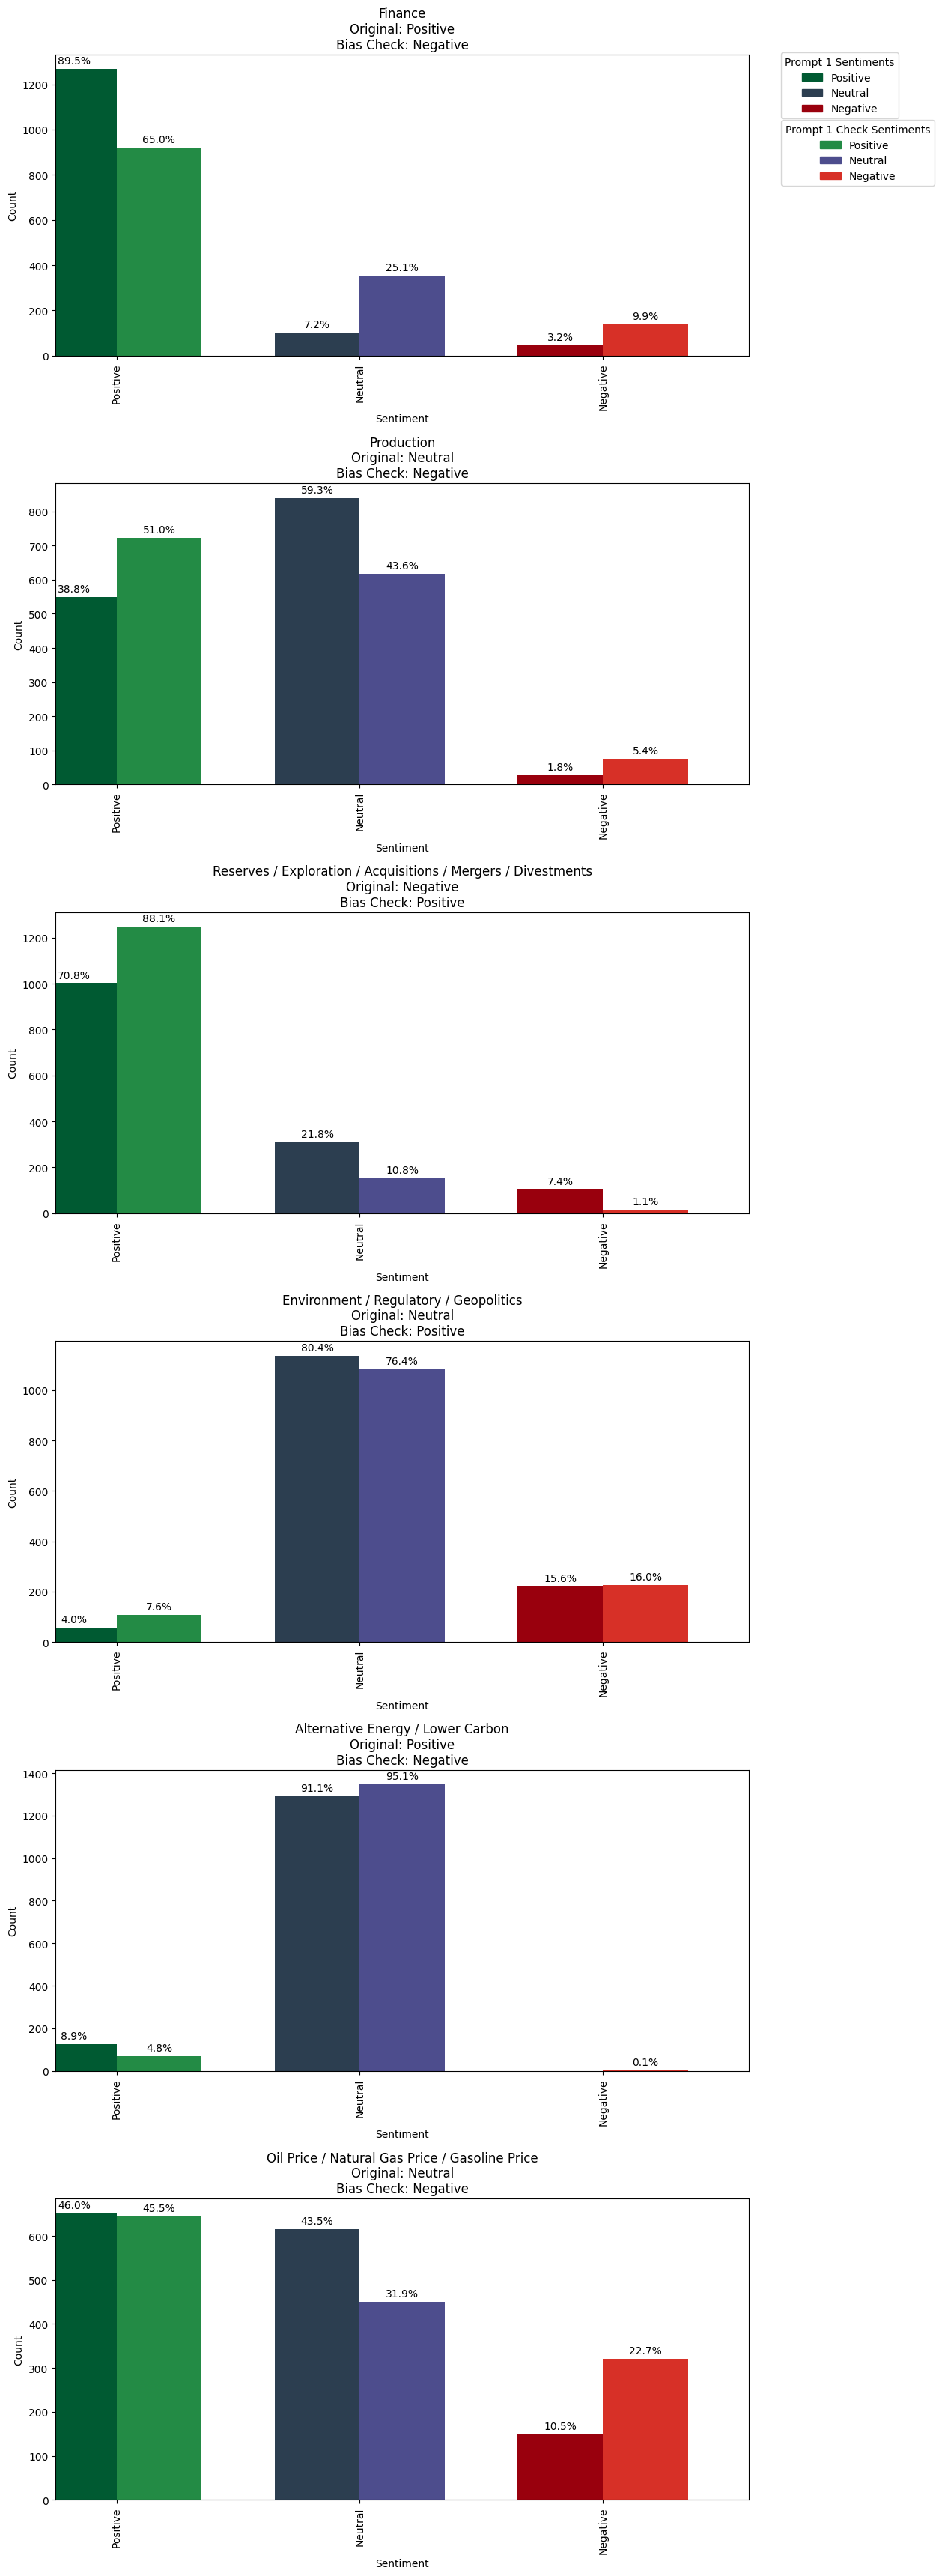

In [7]:
# Prepare data for plotting
def prepare_data_for_plotting(df, df_name):
    """
    Prepares data for plotting by counting the occurrences of each sentiment
    in the specified sentiment columns of the given dataframe.

    Parameters:
    df (pd.DataFrame): The dataframe containing the sentiment data.
    df_name (str): The name of the dataframe, used to label the data source in the output.

    Returns:
    pd.DataFrame: A new dataframe with columns ['Category', 'Sentiment', 'Count', 'DataFrame']
                  where each row represents the count of a particular sentiment in a specific category.
    """
    data = []
    for column in SENTIMENT_COLUMNS:
        sentiment_counts = df[column].value_counts().reindex(HUE_ORDER).fillna(0).astype(int)
        for sentiment, count in sentiment_counts.items():
            data.append([column, sentiment, count, df_name])
    return pd.DataFrame(data, columns=['Category', 'Sentiment', 'Count', 'DataFrame'])

df1_plot_data = prepare_data_for_plotting(prompt1_df_cleaned, 'Prompt 1')
df2_plot_data = prepare_data_for_plotting(prompt1_check_df_cleaned, 'Prompt 1 Check')
plot_data = pd.concat([df1_plot_data, df2_plot_data])

# Example outputs
example_original = {
    "Finance": "Positive",
    "Production": "Neutral",
    "Reserves / Exploration / Acquisitions / Mergers / Divestments": "Negative",
    "Environment / Regulatory / Geopolitics": "Neutral",
    "Alternative Energy / Lower Carbon": "Positive",
    "Oil Price / Natural Gas Price / Gasoline Price": "Neutral"
}

example_bias = {
    "Finance": "Negative",
    "Production": "Negative",
    "Reserves / Exploration / Acquisitions / Mergers / Divestments": "Positive",
    "Environment / Regulatory / Geopolitics": "Positive",
    "Alternative Energy / Lower Carbon": "Negative",
    "Oil Price / Natural Gas Price / Gasoline Price": "Negative"
}

# Plot using seaborn
fig, axes = plt.subplots(len(SENTIMENT_COLUMNS), 1, figsize=(12, 30))  # Make the plots taller

for idx, column in enumerate(SENTIMENT_COLUMNS):
    df1_counts = prompt1_df_cleaned[column].value_counts().reindex(HUE_ORDER).fillna(0).astype(int)
    df2_counts = prompt1_check_df_cleaned[column].value_counts().reindex(HUE_ORDER).fillna(0).astype(int)

    ax = axes[idx]
    width = 0.35
    df1_counts.plot(kind='bar', ax=ax, position=1, label='Prompt 1', color=[PALETTE_1[sent] for sent in HUE_ORDER], width=width)
    df2_counts.plot(kind='bar', ax=ax, position=0, label='Prompt 1 Check', color=[PALETTE_2[sent] for sent in HUE_ORDER], width=width)

    ax.set_title(f'{column}\nOriginal: {example_original[column]}\nBias Check: {example_bias[column]}')
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Count')

    # Add percentage labels for Prompt 1
    for p in ax.patches[:len(df1_counts)]:
        height = p.get_height()
        total = df1_counts.sum()
        if height > 0:
            percentage = f'{height / total * 100:.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

    # Add percentage labels for Prompt 1 Check
    for p in ax.patches[len(df1_counts):]:
        height = p.get_height()
        total = df2_counts.sum()
        if height > 0:
            percentage = f'{height / total * 100:.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

# Create custom legends on the right side
handles_1 = [plt.Rectangle((0,0),1,1, color=PALETTE_1[sent]) for sent in HUE_ORDER]
handles_2 = [plt.Rectangle((0,0),1,1, color=PALETTE_2[sent]) for sent in HUE_ORDER]
labels = HUE_ORDER

fig.legend(handles_1, labels, loc='center right', bbox_to_anchor=(1.01, 1.11), title='Prompt 1 Sentiments')
fig.legend(handles_2, labels, loc='center right', bbox_to_anchor=(1.05, 1.08), title='Prompt 1 Check Sentiments')

plt.tight_layout(rect=[0, 0, 0.85, 1.15])
plt.show()

In [8]:
#@title Prompt Comparisons

# Original Prompt Output
original_output = """
<ul>
    <li>Finance - Positive</li>
    <li>Production - Neutral</li>
    <li>Reserves / Exploration / Acquisitions / Mergers / Divestments - Negative</li>
    <li>Environment / Regulatory / Geopolitics - Neutral</li>
    <li>Alternative Energy / Lower Carbon - Positive</li>
    <li>Oil Price / Natural Gas Price / Gasoline Price - Neutral</li>
</ul>
"""

# Bias Check Prompt Output
bias_check_output = """
<ul>
    <li>Finance - Negative</li>
    <li>Production - Negative</li>
    <li>Reserves / Exploration / Acquisitions / Mergers / Divestments - Positive</li>
    <li>Environment / Regulatory / Geopolitics - Positive</li>
    <li>Alternative Energy / Lower Carbon - Negative</li>
    <li>Oil Price / Natural Gas Price / Gasoline Price - Negative</li>
</ul>
"""

# HTML template to display side by side
html_content = f"""
<div style="display: flex; justify-content: space-between;">
    <div style="margin-right: 20px;">
        <h3>Original Prompt Output</h3>
        {original_output}
    </div>
    <div>
        <h3>Bias Check Prompt Output</h3>
        {bias_check_output}
    </div>
</div>
"""

# Display the HTML content
display(HTML(html_content))